# Análisis de Diabetes


In [31]:
import pandas as pd
from plotting import plot_comparatives
from utils import extract_parameters, sort_dataframe_by

database = 'Diabetes'
cv = 5
extension = f'{database}_cv_{cv}.csv'
df_nn = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/neural_network_classification_{extension}')
df_nystrom_and_ridge = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/Nystrom_and_ridge_classification_{extension}')
df_rbf_and_ridge = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/RBF_and_ridge_classification_{extension}')
df_nystrom_and_svm = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/Nystrom_and_svm_classification_{extension}')
file_path_for_ksvm = f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/KSVM_classification_{database}_cv_{cv}.txt'


df_with_n_components = [df_nystrom_and_ridge, df_rbf_and_ridge, df_nystrom_and_svm]
df_labels = ['Nyström and ridge classification', 'RFF and ridge classification', 'Nystrom and svm classification']

damping_formula = lambda accuracy, time : accuracy / time *100
damping_column = 'damping'
for df in df_with_n_components:
    df['damping'] = damping_formula(df.accuracy_test,df.training_time)


In [32]:
# get KSVM data
best_params, training_time, test_accuracy = extract_parameters(file_path_for_ksvm)
damping = damping_formula(float(test_accuracy),float(training_time))
df_KSVM = pd.DataFrame({
    'model': ['KSVM'],
    'training_time': [training_time],
    'accuracy_test': [test_accuracy],
    'damping': [damping],  
    'best_params': [best_params]
})



constant_values = {
    "training_time" : [training_time],
    'accuracy_test' : [test_accuracy ],
    'damping': [damping]
}
constant_labels = ['KSVM']
df_KSVM

,model,training_time,accuracy_test,damping,best_params
0,KSVM,0.004791,0.744589,15541.336401,"{'svm__C': 316.22776601683796, 'svm__gamma': 0..."


In [33]:
# Concatenate the data frames while adding the model information
df_results = pd.concat([
    df_nystrom_and_ridge.assign(model="nystrom_and_ridge of n_comp. "+df_nystrom_and_ridge["n_components"].astype(str)),
    df_rbf_and_ridge.assign(model="rbf_and_ridge of n_comp. "+df_rbf_and_ridge["n_components"].astype(str)),
    df_nystrom_and_svm.assign(model="nystrom_and_svm of n_comp. "+df_rbf_and_ridge["n_components"].astype(str)),
    df_KSVM
], ignore_index=True)



# Reorder the columns as per your requirement
df_results = df_results[["model", "training_time", "accuracy_test", "damping", "best_params"]]

# Print the unified data frame
df_results

,model,training_time,accuracy_test,damping,best_params
0,nystrom_and_ridge of n_comp. 10,0.004543,0.770563,16961.293681,"{'nystroem__gamma': 0.015625, 'ridge_classific..."
1,nystrom_and_ridge of n_comp. 20,0.001856,0.757576,40815.710087,"{'nystroem__gamma': 0.0013810679320049757, 'ri..."
2,nystrom_and_ridge of n_comp. 50,0.217932,0.744589,341.661065,"{'nystroem__gamma': 0.1767766952966369, 'ridge..."
3,nystrom_and_ridge of n_comp. 100,0.552632,0.757576,137.085009,"{'nystroem__gamma': 0.0013810679320049757, 'ri..."
4,nystrom_and_ridge of n_comp. 200,0.479588,0.753247,157.061207,"{'nystroem__gamma': 0.015625, 'ridge_classific..."
5,rbf_and_ridge of n_comp. 10,0.002514,0.744589,29619.039736,"{'rbf_sampler__gamma': 0.0001220703125, 'ridge..."
6,rbf_and_ridge of n_comp. 20,0.002026,0.783550,38677.721447,"{'rbf_sampler__gamma': 0.0013810679320049757, ..."
7,rbf_and_ridge of n_comp. 50,0.001757,0.774892,44105.464391,"{'rbf_sampler__gamma': 0.0013810679320049757, ..."
8,rbf_and_ridge of n_comp. 100,0.063238,0.783550,1239.046144,"{'rbf_sampler__gamma': 0.0013810679320049757, ..."
9,rbf_and_ridge of n_comp. 200,0.142450,0.774892,543.975121,"{'rbf_sampler__gamma': 0.0013810679320049757, ..."


In [34]:
ranking_size = 6

# Damping 


In [35]:
column_name = 'damping'
print('Sort by ',column_name)
sort_dataframe_by(df_results, column_name, ascending=False, ranking_size=ranking_size)

Sort by  damping


,model,training_time,accuracy_test,damping,best_params
7,rbf_and_ridge of n_comp. 50,0.001757,0.774892,44105.464391,"{'rbf_sampler__gamma': 0.0013810679320049757, ..."
1,nystrom_and_ridge of n_comp. 20,0.001856,0.757576,40815.710087,"{'nystroem__gamma': 0.0013810679320049757, 'ri..."
6,rbf_and_ridge of n_comp. 20,0.002026,0.783550,38677.721447,"{'rbf_sampler__gamma': 0.0013810679320049757, ..."
5,rbf_and_ridge of n_comp. 10,0.002514,0.744589,29619.039736,"{'rbf_sampler__gamma': 0.0001220703125, 'ridge..."
13,nystrom_and_svm of n_comp. 20,0.003805,0.757576,19910.414376,"{'nystroem__gamma': 0.015625, 'svm__C': 3.1622..."
0,nystrom_and_ridge of n_comp. 10,0.004543,0.770563,16961.293681,"{'nystroem__gamma': 0.015625, 'ridge_classific..."


## Accuracy on test

In [36]:
column_name = "accuracy_test"
print('Sort by ',column_name)
sort_dataframe_by(df_results, column_name, ascending=False, ranking_size=ranking_size)

Sort by  accuracy_test


,model,training_time,accuracy_test,damping,best_params
6,rbf_and_ridge of n_comp. 20,0.002026,0.783550,38677.721447,"{'rbf_sampler__gamma': 0.0013810679320049757, ..."
8,rbf_and_ridge of n_comp. 100,0.063238,0.783550,1239.046144,"{'rbf_sampler__gamma': 0.0013810679320049757, ..."
11,rbf_and_ridge of n_comp. 1000,0.447254,0.779221,174.223252,"{'rbf_sampler__gamma': 0.0013810679320049757, ..."
9,rbf_and_ridge of n_comp. 200,0.142450,0.774892,543.975121,"{'rbf_sampler__gamma': 0.0013810679320049757, ..."
7,rbf_and_ridge of n_comp. 50,0.001757,0.774892,44105.464391,"{'rbf_sampler__gamma': 0.0013810679320049757, ..."
10,rbf_and_ridge of n_comp. 500,0.579944,0.770563,132.868503,"{'rbf_sampler__gamma': 0.015625, 'ridge_classi..."


# Ranking by time

In [37]:
column_name = "training_time"
print('Sort by ',column_name)
sort_dataframe_by(df_results, column_name, ascending=True, ranking_size=ranking_size)

Sort by  training_time


,model,training_time,accuracy_test,damping,best_params
7,rbf_and_ridge of n_comp. 50,0.001757,0.774892,44105.464391,"{'rbf_sampler__gamma': 0.0013810679320049757, ..."
1,nystrom_and_ridge of n_comp. 20,0.001856,0.757576,40815.710087,"{'nystroem__gamma': 0.0013810679320049757, 'ri..."
6,rbf_and_ridge of n_comp. 20,0.002026,0.783550,38677.721447,"{'rbf_sampler__gamma': 0.0013810679320049757, ..."
5,rbf_and_ridge of n_comp. 10,0.002514,0.744589,29619.039736,"{'rbf_sampler__gamma': 0.0001220703125, 'ridge..."
13,nystrom_and_svm of n_comp. 20,0.003805,0.757576,19910.414376,"{'nystroem__gamma': 0.015625, 'svm__C': 3.1622..."
0,nystrom_and_ridge of n_comp. 10,0.004543,0.770563,16961.293681,"{'nystroem__gamma': 0.015625, 'ridge_classific..."


# Plotting 


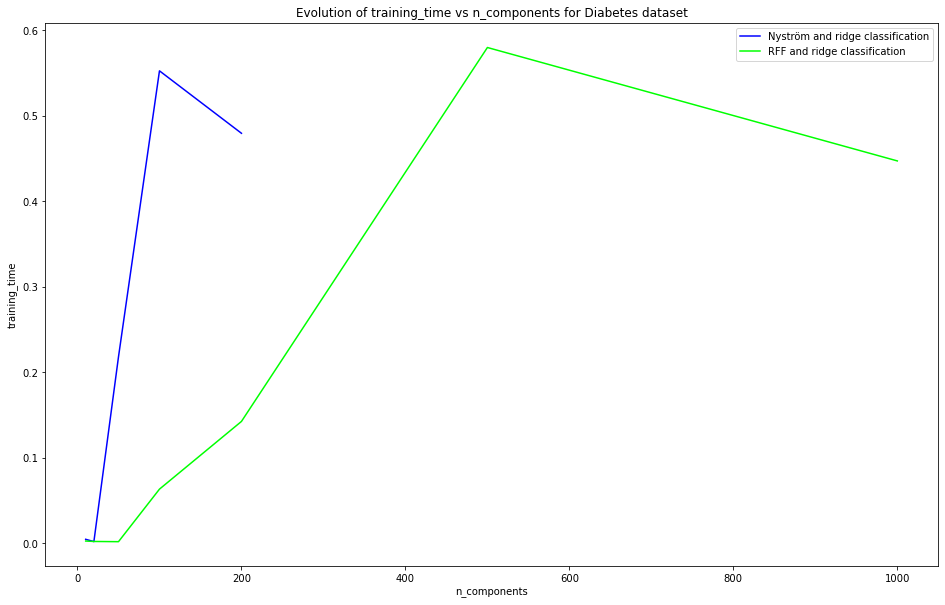

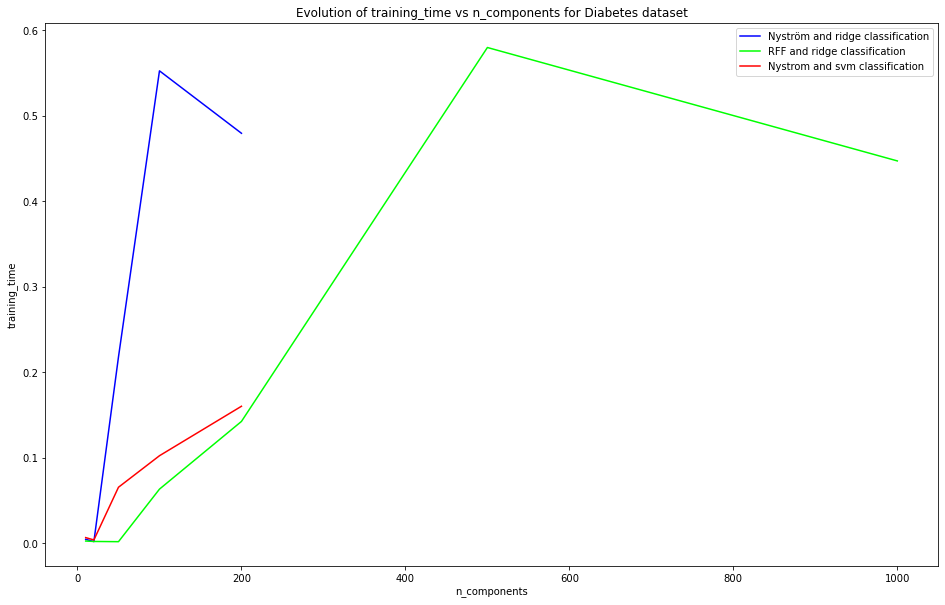

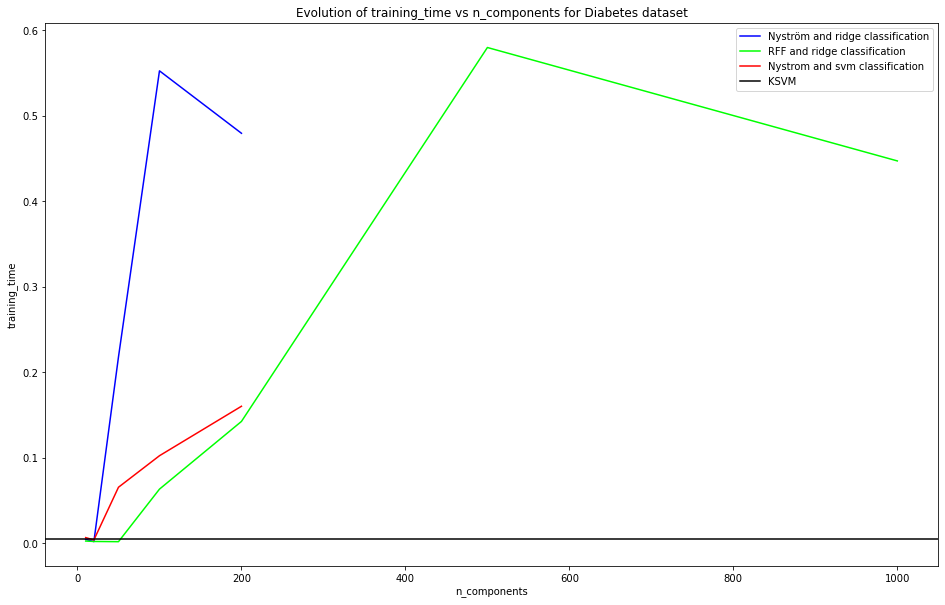

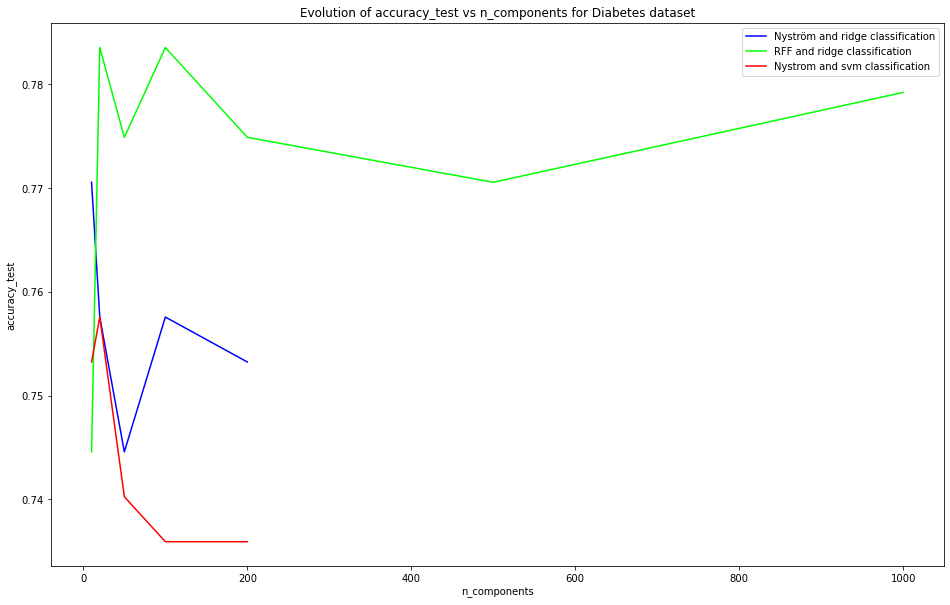

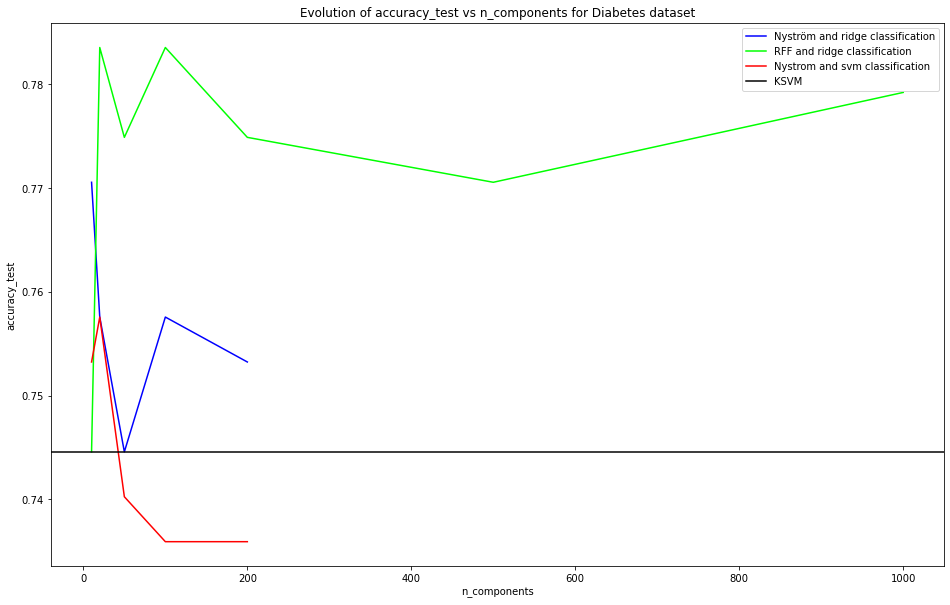

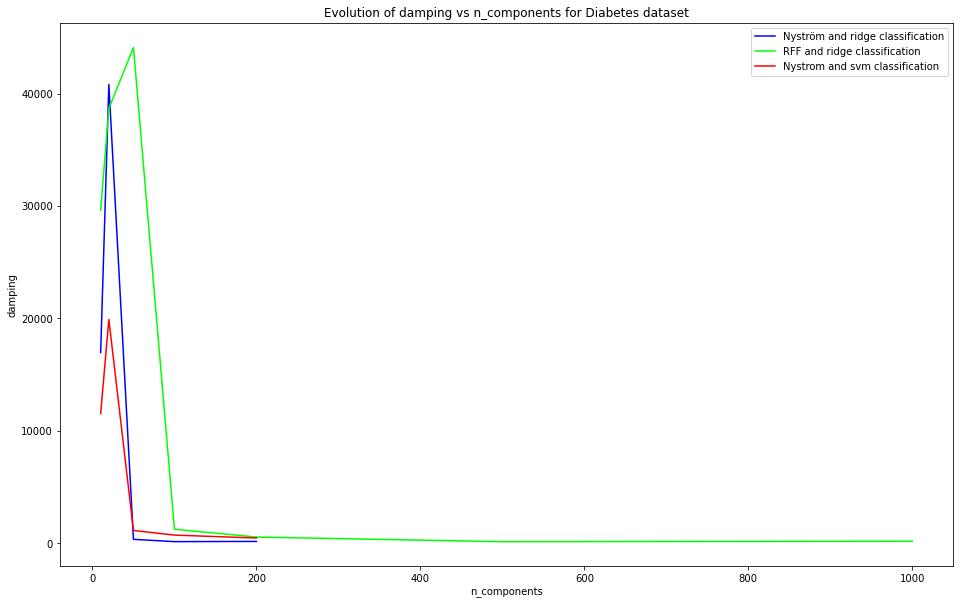

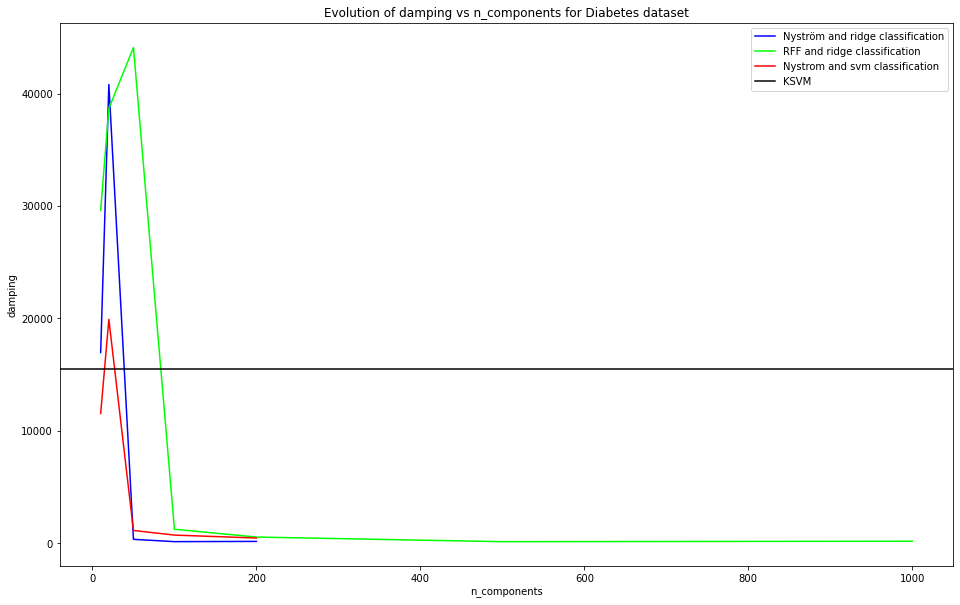

In [38]:

for column in ['training_time', 'accuracy_test', 'damping']:
    title = f'Evolution of {column} vs n_components for {database} dataset'
    if column == 'training_time':
        plot_comparatives(column=column, df_with_n_components=df_with_n_components[:-1], df_labels=df_labels[:-1], title=title)
    plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
    plot_comparatives(column, df_with_n_components, df_labels, title, constant_values[column], constant_labels , False)



In [39]:
nn_accuracy = df_nn.accuracy_test.to_list()
nn_training_time = df_nn.training_time.to_list()
nn_labels = list(map(lambda x: 'NN of shape '+str(x),df_nn.hidden_layer_sizes.to_list()))
df_nn.head()


nn_accuracy.append(test_accuracy)
nn_training_time.append(training_time)
nn_labels.append('KSVM')

In [40]:
nn_accuracy,nn_training_time,nn_labels

([0.7445887445887446,
  0.7359307359307359,
  0.6926406926406926,
  0.7445887445887446],
 [0.9442708492279052,
  0.6617071628570557,
  0.7665998935699463,
  0.0047910213470458984],
 ['NN of shape (644,)',
  'NN of shape (25, 25)',
  'NN of shape (8, 8, 8)',
  'KSVM'])

In [41]:
from plotting import plot_comparatives

# Time analysis adults data set

Conclusion: Radom features win. 

Use Wilcolxon .

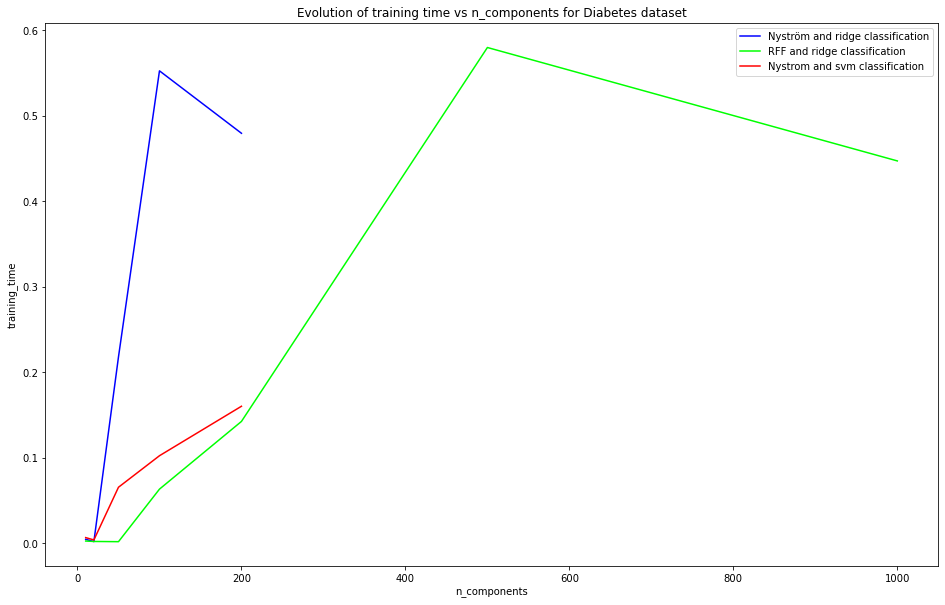

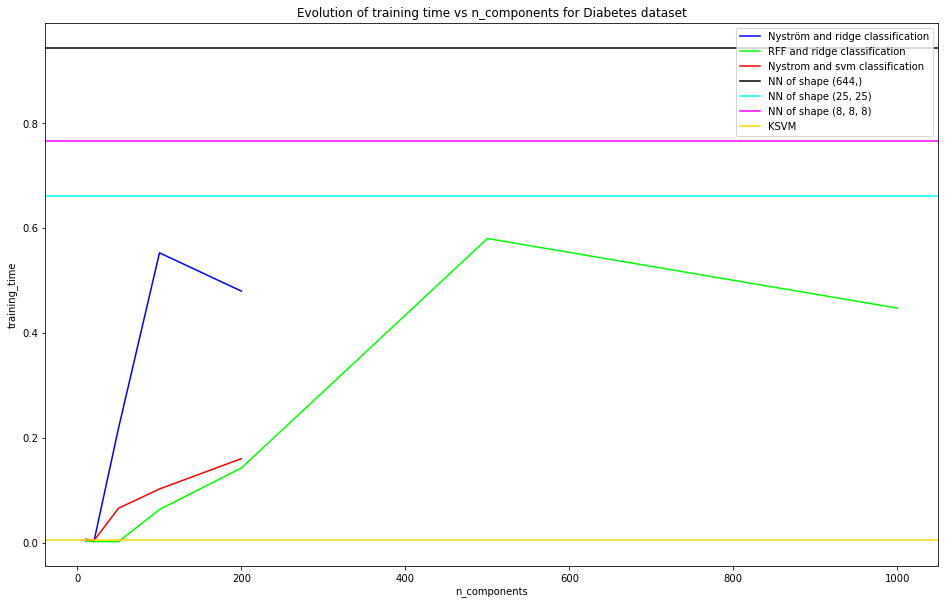

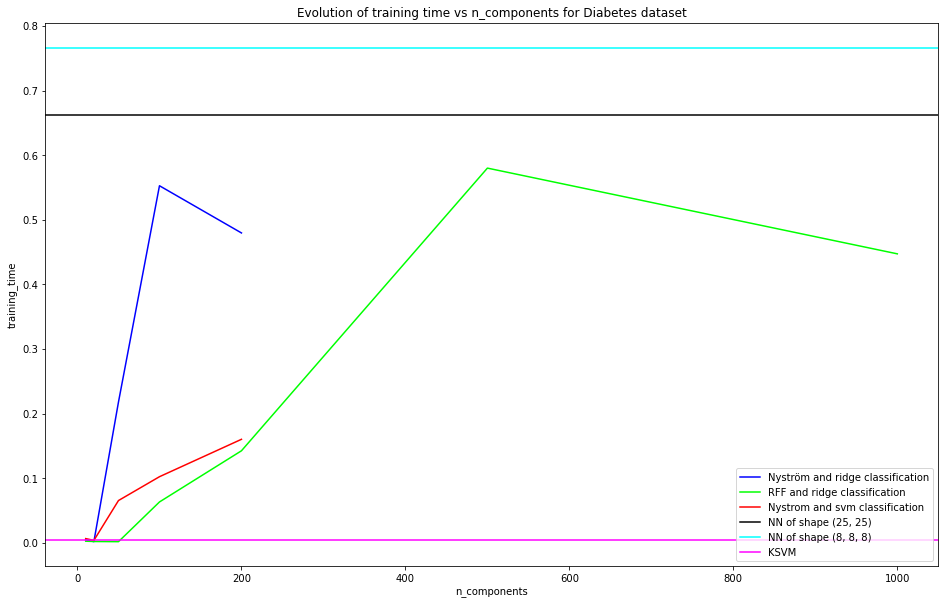

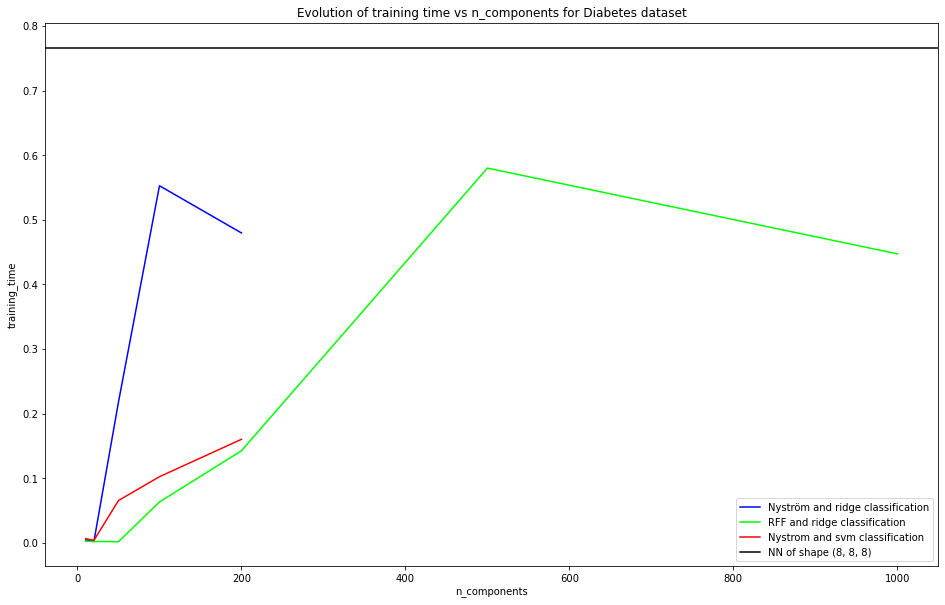

In [42]:

column = 'training_time'
title = f'Evolution of training time vs n_components for {database} dataset'

plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
plot_comparatives(column, df_with_n_components, df_labels, title, nn_training_time, nn_labels, False)
plot_comparatives(column, df_with_n_components, df_labels, title, nn_training_time[1:], nn_labels[1:], False)
plot_comparatives(column, df_with_n_components, df_labels, title, nn_training_time[2:-1], nn_labels[2:-1], False)

# TODO separate
# rm nn and add svc linear
# ksvm 
# rr Nystrom + rfb linear 
# usar intelet

# Accuracy 

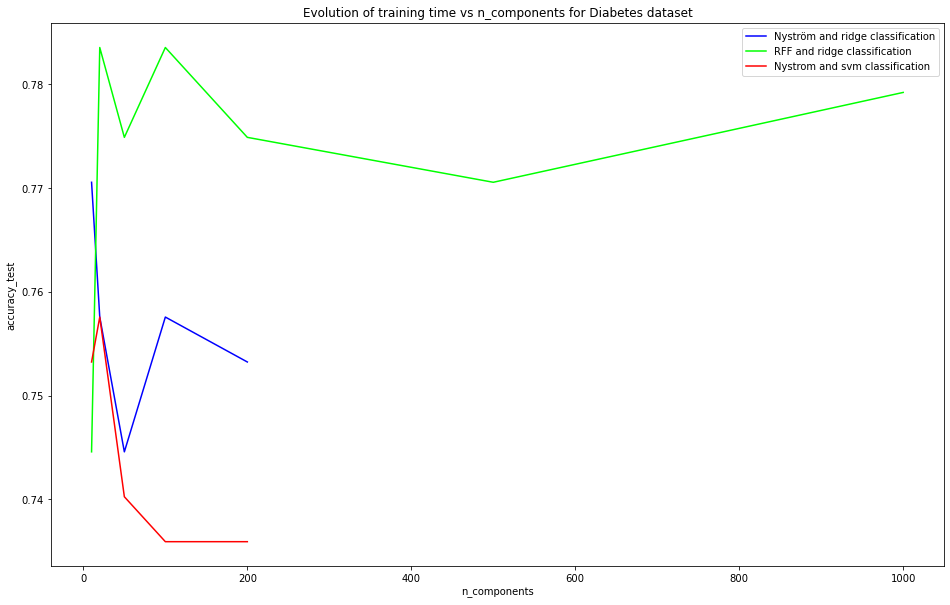

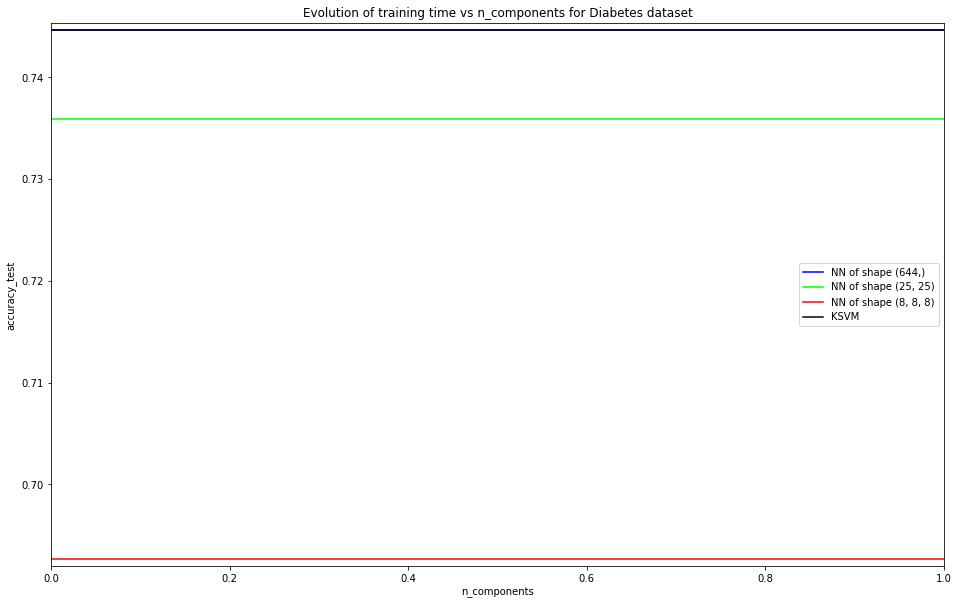

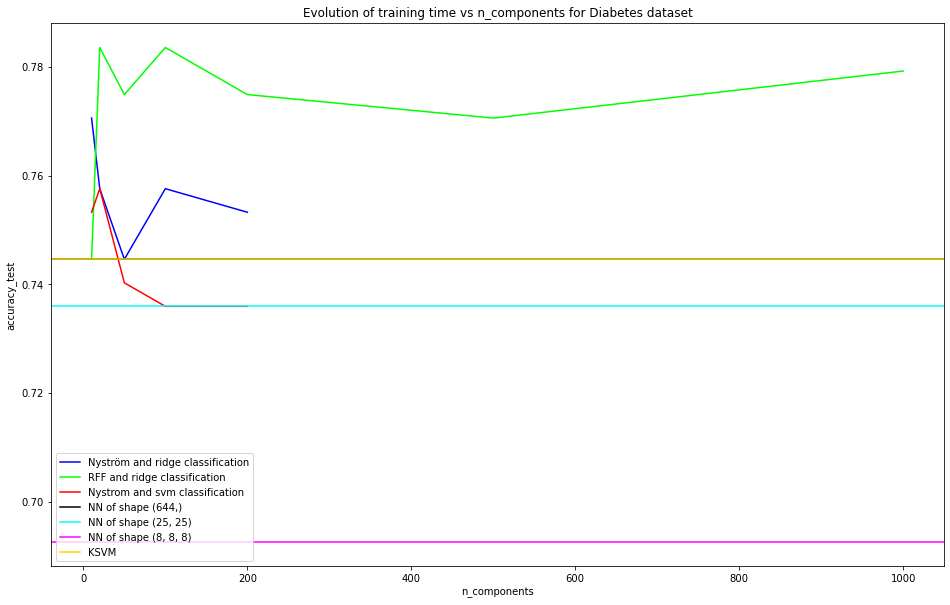

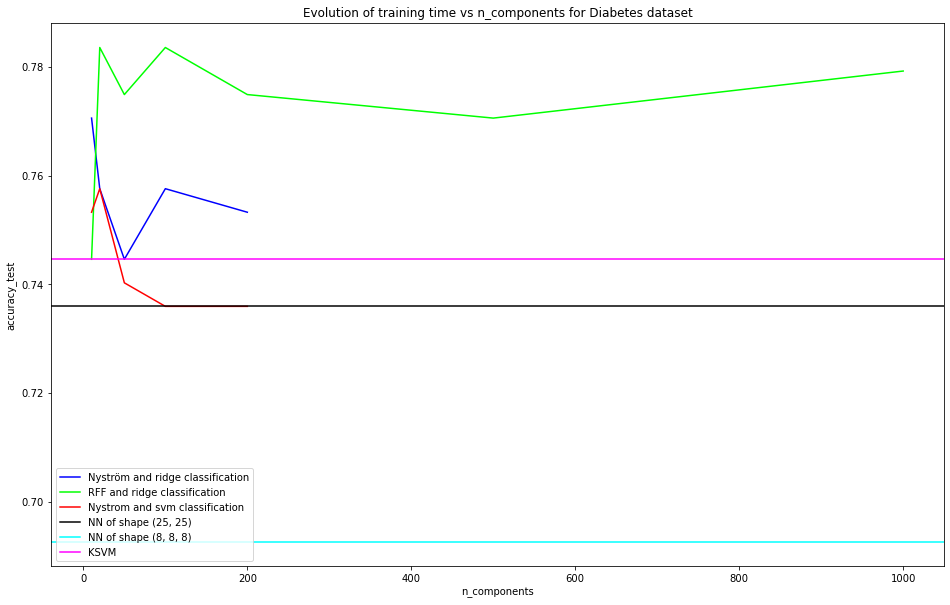

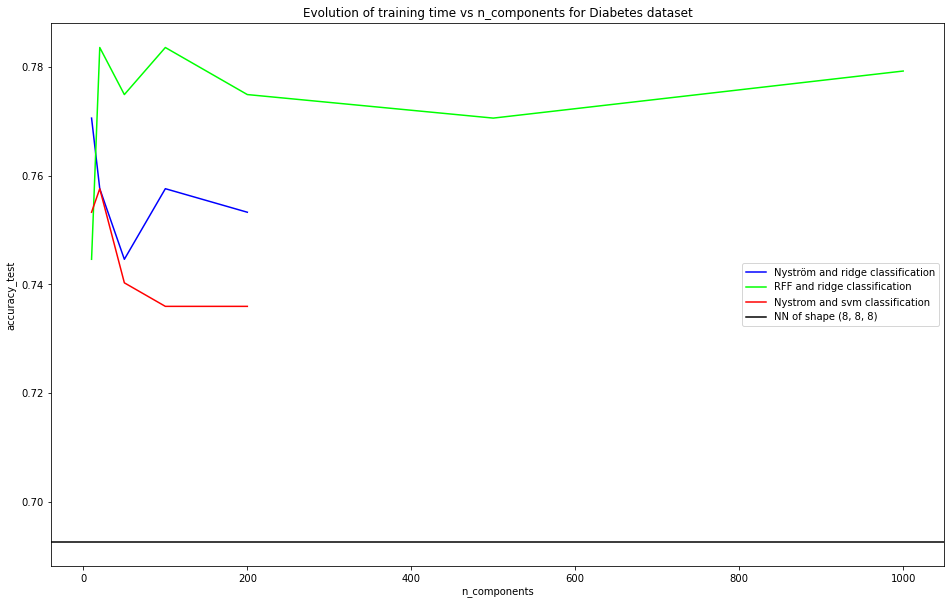

In [43]:
column = 'accuracy_test'

#df_labels = ['Nyström and ridge regression', 'RFF and ridge regression']
#title = 'Evolution of accuracy vs n_components for a9a dataset'
constant_data = nn_accuracy
plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
plot_comparatives(column, [],[], title, constant_data, nn_labels, False)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data, nn_labels, False)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data[1:], nn_labels[1:], False)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data[2:-1], nn_labels[2:-1], False)


# Damping


Formula: 

$$damping = \frac{accuracy}{time} \times 100$$

The bigger the best

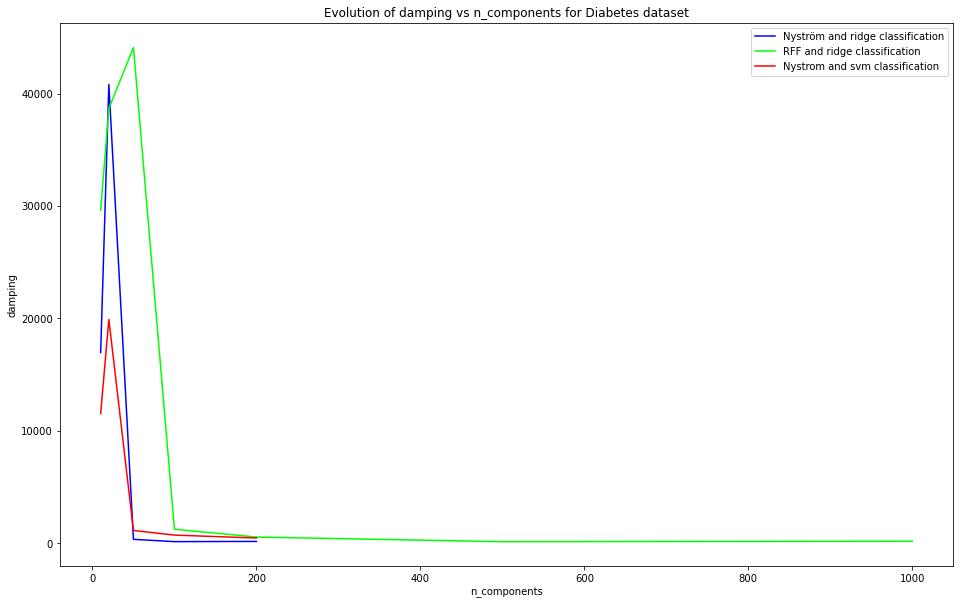

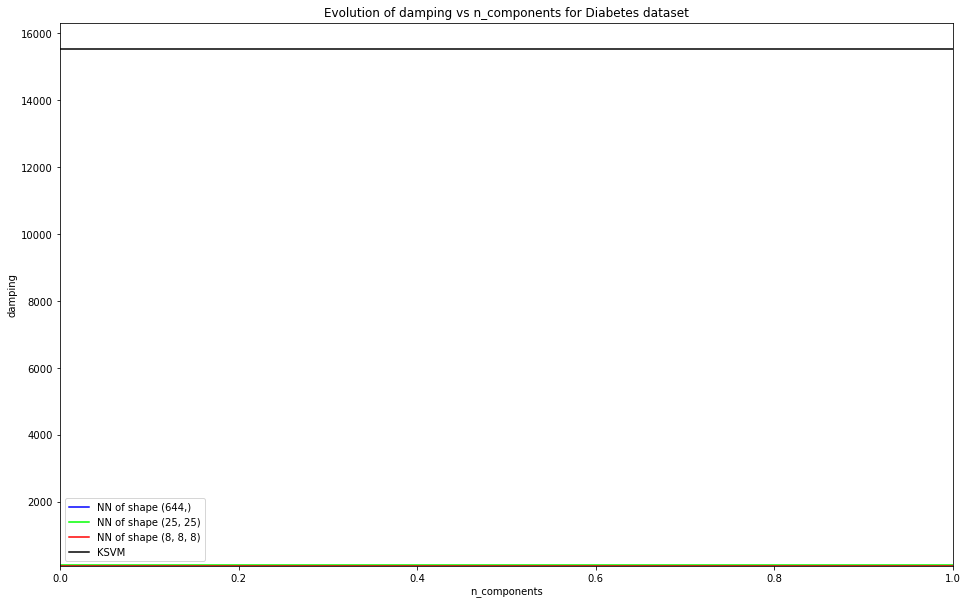

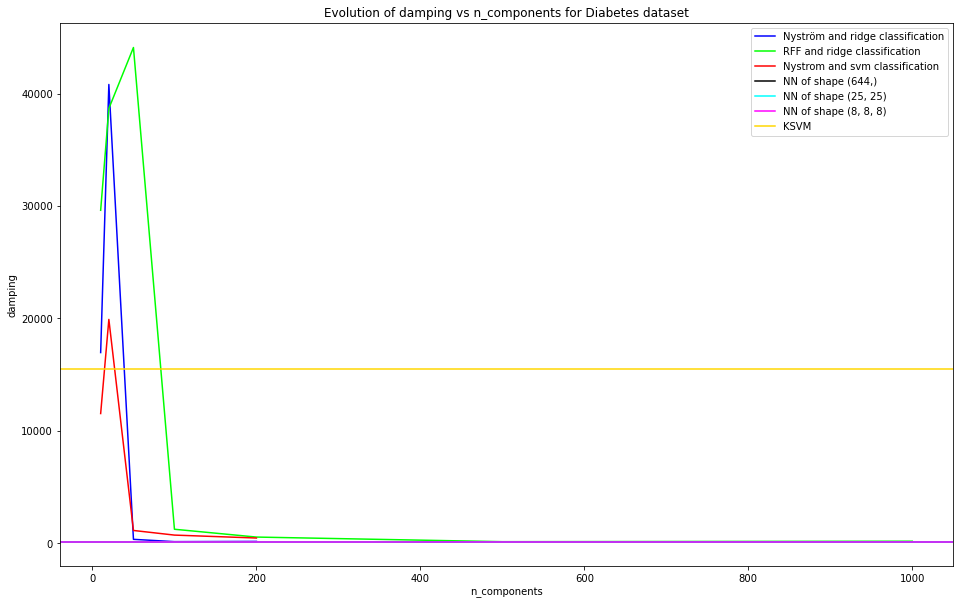

In [44]:
# Computing damping
constant_damping = [acc / time*100 for acc,time in zip(nn_accuracy, nn_training_time)]

# Plotting

column = damping_column
title = f'Evolution of damping vs n_components for {database} dataset'
constant_data = constant_damping
plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
plot_comparatives(column, [],[], title, constant_data, nn_labels, False, constant_margin=0.05)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data, nn_labels, False)